# Analysis of experimental requirements

This notebook is based on Appendix C *Analysis of experimental requirements* of the paper *Can gravity mediate the transmission of quantum information?*

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm # Necessary to make logarithmic contour plots

# Plotting style settings
plt.rcParams.update({
    "text.usetex": True,
})
plt.rcParams.update({"font.family": "serif", "font.size": 12})

# Physical constants and parameters
hbar = 1.055 * 1E-34
kB = 1.381 * 1E-23
G = 6.674 * 1E-11
rho_gold = 19320
temp = 1.0E-6
omega_laser = 1.0E15

In [9]:
# Gravitational critical frequency (see Appendix for its analytic derivation)
w_G = np.sqrt((np.pi / 6) * G * rho_gold)

# Environmental critical frequency
w_T =  kB * temp / hbar

print(f"w_G: {w_G:n}")
print(f"w_T: {w_T:n}")

w_G: 0.000821667
w_T: 130900


In [10]:
def lam(omega):
    """Optomechanical coupling rate."""
    return w_G**2 / omega

def n_bose(omega):
    """Bose-Einstein occupation number."""
    return 1.0 / (np.exp(omega / w_T) - 1.0)

def gamma(omega, q):
    """Mechanical damping rate as a function of 'omega' and quality factor 'q'."""
    return omega / q

def eta(omega, q):
    """Gravity induced transmissivity as a function of 'omega' and quality factor 'q'."""
    factor = q**2 * (w_G / omega)**4
    return 2.0 * factor / (1.0 + np.sqrt(1.0 + 4.0 * factor) + 2.0 * factor)
    
def non_classicality_condition(omega, q):
    """If larger than 1, the gravity-induced channel is non-classical.""" 
    return lam(omega)**2 / (gamma(omega, q)**2 * n_bose(omega) * (n_bose(omega) + 1.0))

def non_classicality_condition_bis(omega, q):
    """If larger than 1, the gravity-induced channel is non-classical.""" 
    return (w_G/omega)**4 * (q**2) / (n_bose(omega) * (n_bose(omega) + 1.0))

def tau(omega, q):
    """Minimum time duration of the experiment."""
    gamma_eff = gamma(omega, q) + np.sqrt(gamma(omega, q)**2 + 4 * lam(omega)**2)
    return 1 / gamma_eff

def eta_min(omega, q, power):
    """Minimum transmissivity at fixed power."""
    return hbar * omega_laser / (tau(omega, q) * power)

def power_min(omega, q):
    """Minimum transmissivity at fixed power."""
    return hbar * omega_laser / (tau(omega, q) * eta(omega, q))

def classical_quantum_boundary_Q(omega):
    return np.sqrt( n_bose(omega) * (n_bose(omega) + 1.0) ) / ( (w_G/omega)**2 )

/tmp/ipykernel_26184/3382503060.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(omega / w_T) - 1.0)
/tmp/ipykernel_26184/3382503060.py:20: RuntimeWarning: divide by zero encountered in divide
  return lam(omega)**2 / (gamma(omega, q)**2 * n_bose(omega) * (n_bose(omega) + 1.0))


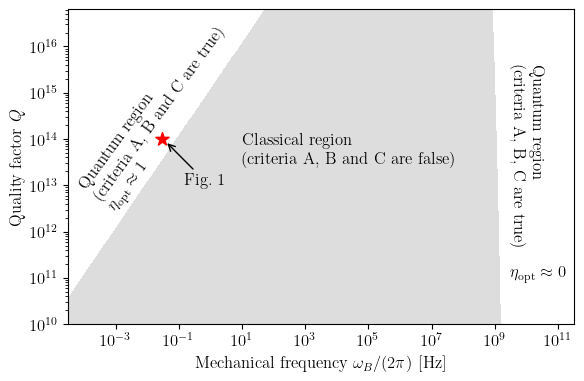

/tmp/ipykernel_26184/3382503060.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(omega / w_T) - 1.0)
/tmp/ipykernel_26184/3382503060.py:20: RuntimeWarning: divide by zero encountered in divide
  return lam(omega)**2 / (gamma(omega, q)**2 * n_bose(omega) * (n_bose(omega) + 1.0))


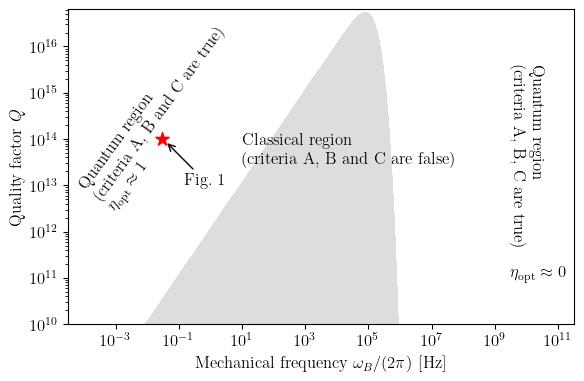

In [11]:
freqs = np.logspace(-4.5, 11.5, 1000)
omegas =2 * np.pi * freqs

quality_factors = np.logspace(10, 16.8, 1000)

x, y = np.meshgrid(freqs, quality_factors)
xo, y = np.meshgrid(omegas, quality_factors)
z = np.sign(non_classicality_condition(xo, y) - 1.0)

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4), rasterized=True)
c = ax1.pcolormesh(x, y, z, cmap="gray", vmin=-8, vmax=0.1)
ax1.loglog()
ax1.set_xlabel("Mechanical frequency $\\omega_B/ (2\\pi)$ [Hz]")
ax1.set_ylabel("Quality factor $Q$")
ax1.text(0.00006, 0.3*10**13, 'Quantum region \n (criteria A, B and C are true) \n $\eta_{\\rm opt} \\approx 1$', rotation=54)
ax1.text(0.01*10**3, 3*10**13, 'Classical region \n (criteria A, B and C are false)', rotation=0)
ax1.text(0.3*10**10, 5*10**11, 'Quantum region \n (criteria A, B, C are true)', rotation=-90)
ax1.text(0.3*10**10, 10**11, '$\eta_{\\rm opt} \\approx 0$', rotation=0)
ax1.scatter(0.03, 10**14, s=100, marker='*', color='red', zorder=1)
ax1.annotate('Fig.~1', xy=(0.037, 0.9*10**14), xytext=(0.15, 10**13), arrowprops=dict(arrowstyle="->", color="black"))


plt.tight_layout()

fig.savefig(fname="parameter_space_main_text.pdf", dpi=300)

In [12]:
n_bose(2*np.pi)

20832.957483629238